# <span style ="color:brown">Bellabeat Case Study</span>

# <span style="color:brown"> Introduction </span>

I am **Uzma Tabassum**. This is __Google Data Analytics Capstone Project__. This is my
first case study. We have given a scenario. Now I am trying to perform my job as
junior data analyst.

# <span style="color:brown"> Scenario </span>
I am a junior data analyst working on the marketing analyst team at **Bellabeat**, a
high-tech manufacturer of health-focused
products for women. **Bellabeat** is a successful small company, but they have
the potential to become a larger player in the global smart device market. **Urška
Sršen**, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing
smart device fitness data could help unlock new growth opportunities for the
company. I have been asked to focus on one of
Bellabeat’s products and analyze smart device data to gain insight into how
consumers are using their smart devices. The insights we discover will then
help guide marketing strategy for the company. I will present my analysis to
the Bellabeat executive team along with our high-level recommendations for
Bellabeat’s marketing strategy

# <span style="color:brown"> A description of all data sources used </span>
Sršen encourages us to use public data that explores smart device users’ daily
habits. She points us to a specific data set:
**FitBit Fitness Tracker Data**(CC0: Public Domain, dataset made available
through Mobius): This Kaggle data set
contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users
consented to the submission of
personal tracker data, including minute-level output for **physical activity, heart
rate, and sleep monitoring**. It includes
information about **daily activity, steps, and heart rate** that can be used to explore
users’ habits.
as this is not enough data and there are limitations, because it is only **30 users
records** but we will try to make our analysis good.


# <span style="color:brown"> Loading packages </span>

In [37]:
library(tidyverse)
library(lubridate)
library(dplyr)
library(ggplot2)
library(tidyr)
library(here)
library(skimr)
library(janitor)

# <span style="color:brown"> Importing datasets </span>

In [38]:
calories <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")

daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

weight_info <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
heartrate <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

# <span style="color:brown"> Preview Data set </span>

In [39]:
head(calories)
head(daily_activity)
head(daily_sleep)
head(hourly_steps)
head(weight_info)
head(heartrate)

,Id,ActivityHour,Calories
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,81
2,1503960366,4/12/2016 1:00:00 AM,61
3,1503960366,4/12/2016 2:00:00 AM,59
4,1503960366,4/12/2016 3:00:00 AM,47
5,1503960366,4/12/2016 4:00:00 AM,48
6,1503960366,4/12/2016 5:00:00 AM,48


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


# <span style="color:brown"> Data Cleaning and Formatting</span>
First of all, I opened all csv files in **Excel**. I looked all files one by one and I found
that some files are most important and interesting. For example **daily activity,
sleep, heartrate and weight** etc. So I decided to work with these files. I used
**R programming language** for data cleaning in **R studio**. I checked, is there any
duplicate or null value. After cleaning data, now it is ready to analyze.

In [40]:
# cheking unique values:
n_unique(daily_activity$Id)
n_unique(daily_sleep$Id)
n_unique(hourly_steps$Id)
n_unique(calories$Id)
n_unique(weight_info$Id)
n_unique(heartrate$Id)

[1] 33

[1] 24

[1] 33

[1] 33

[1] 8

[1] 14

In [41]:
# checking dupliates values 
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))
sum(duplicated(hourly_steps))
sum(duplicated(calories))
sum(duplicated(weight_info))
sum(duplicated(heartrate))

[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

[1] 0

In [42]:
#removing duplicate values and missing values from all data.

daily_activity <- daily_activity %>%
  distinct() %>%
  drop_na()

daily_sleep <- daily_sleep %>%
  distinct() %>%
  drop_na()

hourly_steps <- hourly_steps %>%
  distinct() %>%
  drop_na()

calories <- calories%>%
  distinct() %>%
  drop_na()


weight_info <- weight_info %>%
  distinct() %>%
  drop_na()


heartrate <- heartrate %>%
  distinct() %>%
  drop_na()

In [43]:
# checkingg duplicate values in daily_sleep because there was some duplicate values in it.
sum(duplicated(daily_sleep))

[1] 0

Now we have removed all duplicate and missing values from all data. we have also checked there is no duplicate values here

In [44]:
daily_activity <- daily_activity %>%
  rename(date = ActivityDate) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))

daily_sleep <- daily_sleep %>%
 rename(date = SleepDay) %>%
  mutate(date = as_date(date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `date = as_date(date, format = "%m/%d/%Y %I:%M:%S %p", tz =
  Sys.timezone())`.
Caused by warning:
! `tz` argument is ignored by `as_date()`”


In [45]:
head(daily_activity)
head(daily_sleep)

Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


In [46]:
hourly_steps<- hourly_steps %>% 
  rename(date_time = ActivityHour) %>% 
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))

head(hourly_steps)

Id,date_time,StepTotal
<dbl>,<dttm>,<dbl>
1503960366,2016-04-12 00:00:00,373
1503960366,2016-04-12 01:00:00,160
1503960366,2016-04-12 02:00:00,151
1503960366,2016-04-12 03:00:00,0
1503960366,2016-04-12 04:00:00,0
1503960366,2016-04-12 05:00:00,0


# <span style="color:brown">Data Analysis </span>

I am analyzing daily activities. I will analyse the relationship between following,
- daily steps and daily sleep.
- daily steps and calories.
- Daily sleep and sedentary minutes. 

etc.


I will also findout Average sleep per day, Average heartrate, Average steps etc.

In [47]:
daily_activity
daily_activity %>%  
  select(TotalSteps,
         TotalDistance,
         SedentaryMinutes, Calories) %>%
  summary()

Id,date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,2016-04-18,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,2016-04-20,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

As we can see average daily steps are 7638, average calories are  2304, average sedentry minutes are 991.2, average total distance are 5.490. Reseach shows that women should aim to burn around 2000 calories per day and men should burn around 2500 calories per day and 8000 to 10000 steps per day is recomended.

In [48]:
# explore num of active minutes per category
daily_activity%>%
  select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  summary()

# calories
calories %>%
  select(Calories) %>%
  summary()

 VeryActiveMinutes FairlyActiveMinutes LightlyActiveMinutes
 Min.   :  0.00    Min.   :  0.00      Min.   :  0.0       
 1st Qu.:  0.00    1st Qu.:  0.00      1st Qu.:127.0       
 Median :  4.00    Median :  6.00      Median :199.0       
 Mean   : 21.16    Mean   : 13.56      Mean   :192.8       
 3rd Qu.: 32.00    3rd Qu.: 19.00      3rd Qu.:264.0       
 Max.   :210.00    Max.   :143.00      Max.   :518.0       

    Calories     
 Min.   : 42.00  
 1st Qu.: 63.00  
 Median : 83.00  
 Mean   : 97.39  
 3rd Qu.:108.00  
 Max.   :948.00  

In [49]:
# sleep
daily_sleep %>%
  select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

 average sleep is 419 minutes. average time in bed is 458 minutes. Research shows that 420 minutes (7 hour) of sleep is necessary.

In [50]:
# weight
weight_info  %>%
  select(WeightKg, BMI) %>%
  summary()

    WeightKg          BMI       
 Min.   :52.60   Min.   :22.65  
 1st Qu.:57.55   1st Qu.:23.85  
 Median :62.50   Median :25.05  
 Mean   :62.50   Mean   :25.05  
 3rd Qu.:67.45   3rd Qu.:26.25  
 Max.   :72.40   Max.   :27.45  

as we see, average weight is 62 kg, average BMI is 25. Resarch shows that ideal body weight for men is 50kg + 1.9kg for every inch above 5 feet and 49kg + 1.7kg is for women. Normal BMI Shoud be between 18.5 and 24.9

In [51]:
heartrate %>%
  select(Value) %>%
  summary()

     Value       
 Min.   : 36.00  
 1st Qu.: 63.00  
 Median : 73.00  
 Mean   : 77.33  
 3rd Qu.: 88.00  
 Max.   :203.00  

average heartrate is 77.33. A normal resting heartrate should be between 60 to 100 beats per minute but it can vary person to person. Condition when the heartbeat Beyond 120 140 per minute or falls below 60 beats pee minutes can be dangerous.

now I will merge sleep and daily activiy data to analyse.

In [52]:
merged_data <- merge(daily_sleep, daily_activity, by=c('Id', 'date'))
head(merged_data)

,Id,date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2016-04-12,1,327,346,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,2016-04-13,2,384,407,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,2016-04-15,1,412,442,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
4,1503960366,2016-04-16,2,340,367,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
5,1503960366,2016-04-17,1,700,712,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
6,1503960366,2016-04-19,1,304,320,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035


In [53]:
weekday_steps_sleep <- merged_data %>%
  mutate(weekday = weekdays(date))

weekday_steps_sleep$weekday <-ordered(weekday_steps_sleep$weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
                                                                            "Friday", "Saturday", "Sunday"))

weekday_steps_sleep <-weekday_steps_sleep%>%
  group_by(weekday) %>%
  summarize (daily_steps = mean(TotalSteps), daily_sleep = mean(TotalMinutesAsleep))

In [54]:
head(weekday_steps_sleep)

weekday,daily_steps,daily_sleep
<ord>,<dbl>,<dbl>
Monday,9273.217,419.5000
Tuesday,9182.692,404.5385
Wednesday,8022.864,434.6818
Thursday,8183.516,401.2969
Friday,7901.404,405.4211
Saturday,9871.123,419.0702


# <span style="color:brown"> Visualizations and key findings </span>
Using **ggplot2**, we get beautiful visualisation for our analysis.


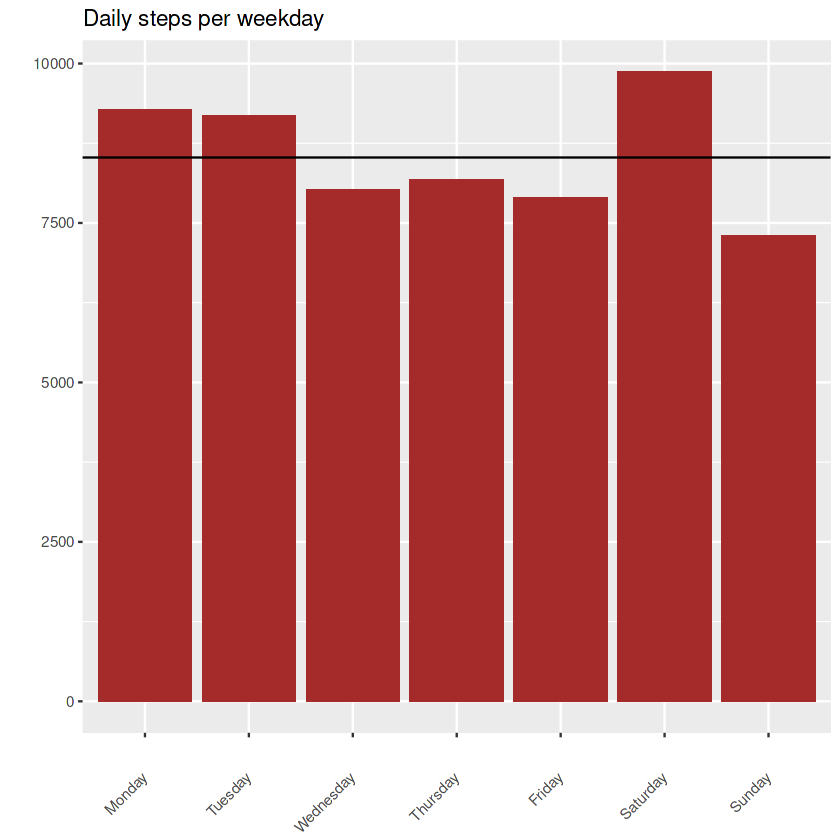

In [55]:
ggplot(weekday_steps_sleep) +
  geom_col(aes(weekday, daily_steps), fill = "brown") +
  geom_hline(yintercept = 8533) +
  labs(title = "Daily steps per weekday", x= "", y = "") +
  theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))

satarday is most active day. sunday is least active day.

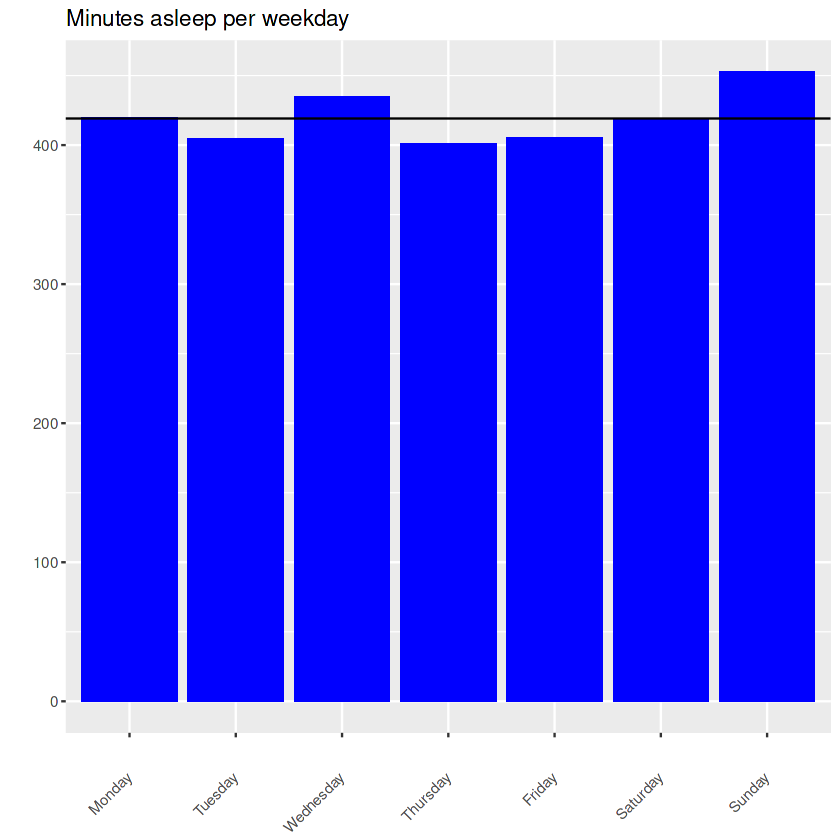

In [56]:
ggplot(weekday_steps_sleep, aes(weekday, daily_sleep)) +
  geom_col(fill = "blue") +
  geom_hline(yintercept = 419) +
  labs(title = "Minutes asleep per weekday", x= "", y = "") +
  theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))

sunday is most sleepy day

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


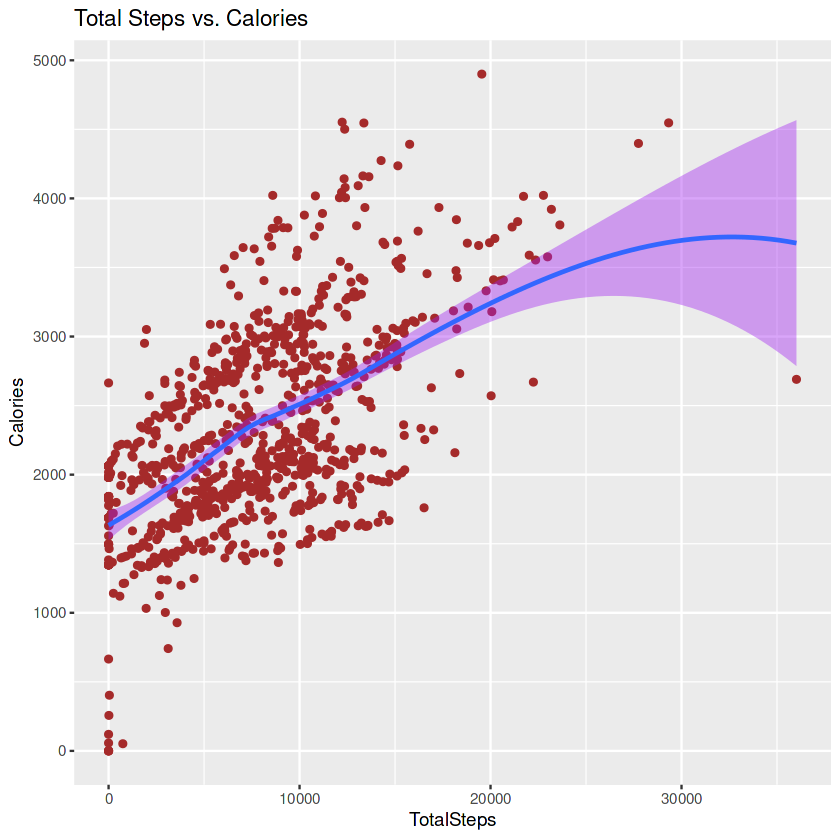

In [58]:
ggplot(data=daily_activity, aes(x=TotalSteps, y=Calories)) + 
  geom_point(color = "brown") + geom_smooth(fill = "purple") + labs(title="Total Steps vs. Calories")

there is a positive relationship between calories and total step. We should increase total steps per day in order to burn more calories.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


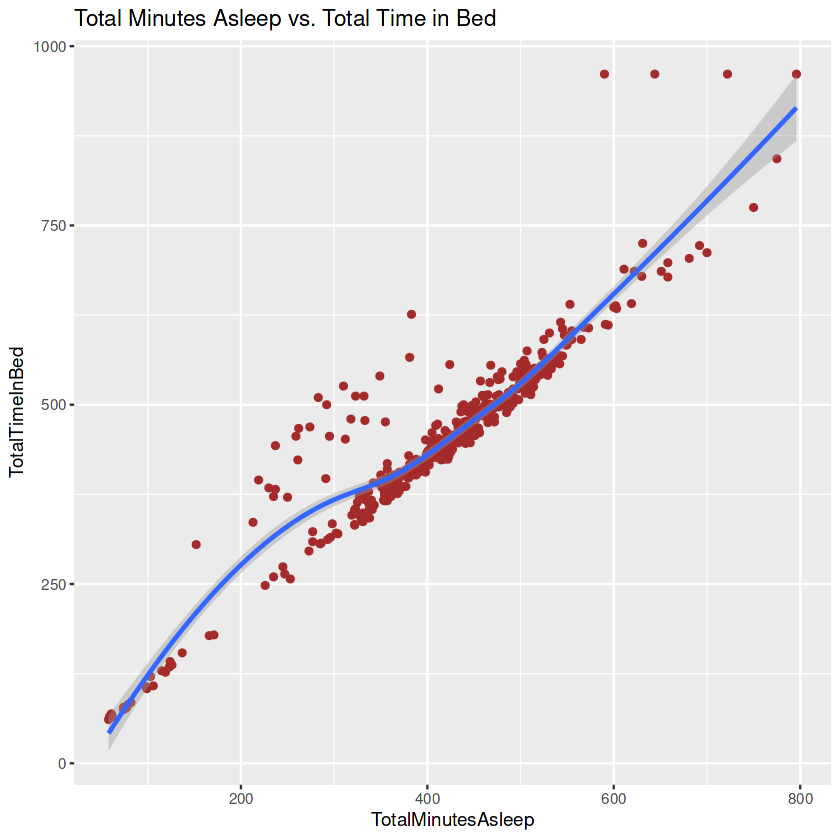

In [61]:
ggplot(data=daily_sleep, aes(x=TotalMinutesAsleep, y=TotalTimeInBed)) + 
  geom_point(color="brown")+ geom_smooth() + labs(title="Total Minutes Asleep vs. Total Time in Bed")

There is a positive relationship between sleep and total time in bed.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


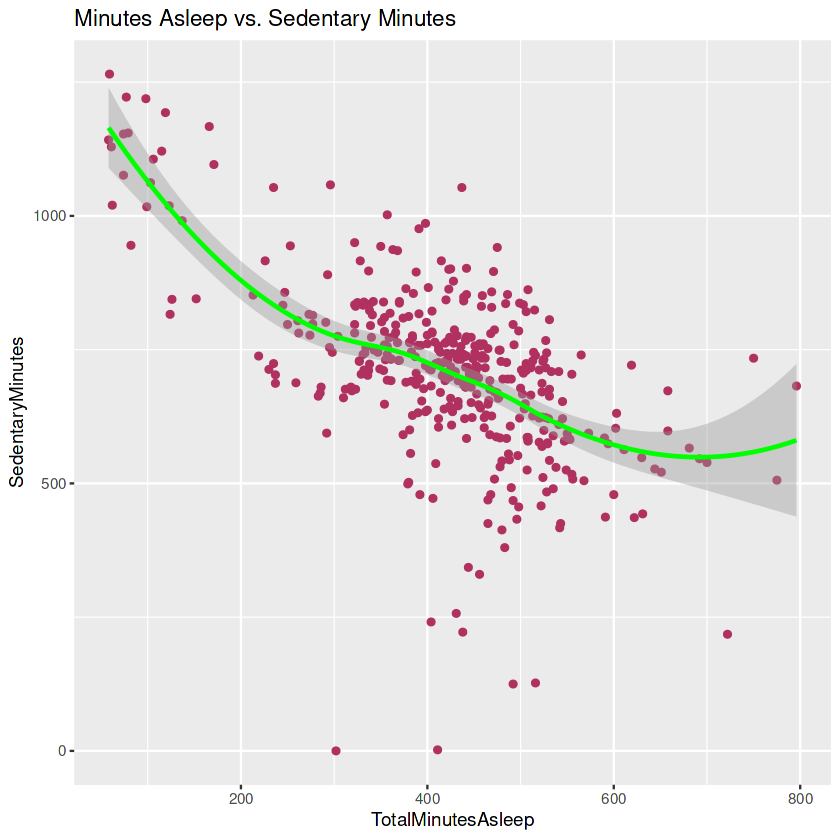

In [62]:
ggplot(data=merged_data, aes(x=TotalMinutesAsleep, y=SedentaryMinutes)) + 
  geom_point(color='maroon') + geom_smooth(color='green') +
  labs(title="Minutes Asleep vs. Sedentary Minutes")

there is a negative relation between sleep and sedentary minute. that means activeness is a reason of good sleep. If we want to sleep well we should try to be active.

# <span style="color:brown"> Conclusion </span>

We analysed given data. Now we can conclude our analysis. We find out that
averages total steps are 7638 which is less than the recomended 8000 steps per
day but this is very minor difference. People can easily overcome this problem by
increasing daily steps. Average Daily sleep is approximately equal to recommended
daily sleep that means 7 hour a day. Average Weight and average BMI is little
bit greater than ideal weight and normal BMI. Average heartrate is 77 which is
absolutely normal. One thing we notice here is a little downward trend in calories
burn over time and total step over time. We have two month record of people. In
beginning or first month they burn more calories and they take more steps per
day. But this is not a big problem we can overcome this problem by putting some
more interesting exercise and interesting stuff on our bellabeat smart device app
to increase people interest over time. By this way we can motivate people to keep
themselves more active and keep their body more healthy.

# <span style="color:brown"> Resources </span>
we search all information about health on google.

##### <span style="color:brown"> Thanks for your interest in this Bellabeat case study. This is my first case study. I will appreciate your comments and feed back on my first  case study project. Thanks again  </span>